In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install Bio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.0/281.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.6 MB/s eta 0:00:00


In [3]:
import Bio
from Bio import SeqIO
count = 0
sequences = [] # Here we are setting up an array to save our sequences for the next step

for seq_record in SeqIO.parse(r"/content/drive/MyDrive/NLP_Datasets/genome.fa", "fasta"):
    if (count < 1):

        sequences.append(seq_record)


        count = count + 1

In [4]:
sequences[0]


SeqRecord(seq=Seq('Cgacaatgcacgacagaggaagcagaacagatatttagattgcctctcattttc...gag'), id='chr2L', name='chr2L', description='chr2L', dbxrefs=[])

In [5]:
pip install colorama

# Display The DNA

In [6]:
from colorama import Back, Style, Fore

nu_clr_switcher = {
    # standard color-codes
    'A': Back.GREEN,
    'a': Back.GREEN,
    'C': Back.YELLOW,
    'c': Back.YELLOW,
    'G': Back.RED,
    'g': Back.RED,
    'T': Back.BLUE,
    't': Back.BLUE,
    ' ': Style.RESET_ALL
}

In [7]:
def ten_nucleotide_seq(genome):
    genes = []
    for ix, char in enumerate(genome):
        if ix != 0 and ix%10 == 0:
            genes.append(' ')
        genes.append(char)
    return ''.join(genes)

In [8]:
def seq_repr(genome_str, strand ='dna'):
    if strand == 'dna':
        genome_str = ten_nucleotide_seq(genome=genome_str)
        line_break_cntr = 0
        for i in range(len(genome_str)):
            if genome_str[i] == ' ':
                line_break_cntr += 1
                if line_break_cntr>0 and line_break_cntr%6==0:
                    text = "\n"
                else:
                    text = nu_clr_switcher[genome_str[i]] + genome_str[i]
            else:
                text = nu_clr_switcher[genome_str[i]] + genome_str[i]
            print(text, end="")
        Style.RESET_ALL


In [9]:
print("Genome structure: ")
seq_repr(sequences[0][0:300])

Genome structure: 
Cgacaatgca cgacagagga agcagaacag atatttagat tgcctctcat tttctctccc
atattatagg gagaaatatg atcgcgtatg cgagagtagt gccaacatat tgtgctcttt
gattttttgg caacccaaaa tggtggcgga tgaaCGAGAT GATAATATAT TCAAGTTGCC
GCTAATCAGA AATAAATTCA TTGCAACGTT AAATACAGCA CAATATATGA TCGCGTATGC
GAGAGTAGTG CCAACATATT GTGCTAATGA GTGCCTCTCG TTCTCTGTCT TATATTACCG

In [10]:
import pandas as pd
import numpy as np
import os

df = pd.read_csv(r"/content/drive/MyDrive/NLP_Datasets/NonPromoterSequence.txt", sep = '>', )
df

,Unnamed: 0,EP 1 (+) mt:CoI_1; range -400 to -100.
0,TAATTACATTATTTTTTTATTTACGAATTTGTTATTCCGCTTTTAT...,NaN
1,NaN,EP 2 (+) mt:CoIII_1; range -400 to -100.
2,ATTTTTACAAGAACAAGACATTTAACTTTAACTTTATCTTTAGCTT...,NaN
3,NaN,EP 3 (+) plexB_1; range -400 to -100.
4,AGAGATAGGTGGGTCTGTAACACTCGAATCAAAAACAATATTAAGA...,NaN
...,...,...
22594,GCATGGATTTCATATTATCTTAATCGACTTGCTTTTATAAAATAGG...,NaN
22595,NaN,EP11299 (+) DNApol-eta_1; range -400 to -100.
22596,GTGACCAGGTTTTGCTCTAATGCGAAGTACGGATTGGGTAGAGATA...,NaN
22597,NaN,EP11300 (+) CG7448_1; range -400 to -100.


In [11]:
df.dropna(subset=['Unnamed: 0'], how='all', inplace=True)

In [12]:
df

,Unnamed: 0,EP 1 (+) mt:CoI_1; range -400 to -100.
0,TAATTACATTATTTTTTTATTTACGAATTTGTTATTCCGCTTTTAT...,NaN
2,ATTTTTACAAGAACAAGACATTTAACTTTAACTTTATCTTTAGCTT...,NaN
4,AGAGATAGGTGGGTCTGTAACACTCGAATCAAAAACAATATTAAGA...,NaN
6,TATGTATATAGAGATAGGCGTTGCCAATAACTTTTGCGTTTTTTGC...,NaN
8,AGAAATAATAGCTAGAGCAAAAAACAGCTTAGAACGGCTGATGCTC...,NaN
...,...,...
22590,TGGTAAAAAATTGTACACCTAACTAGTGCCTTCATGTATACCACCA...,NaN
22592,AGTGCAACTGGAGCCGTGCCGTGACCCACAGAGATCGCCCACTCGA...,NaN
22594,GCATGGATTTCATATTATCTTAATCGACTTGCTTTTATAAAATAGG...,NaN
22596,GTGACCAGGTTTTGCTCTAATGCGAAGTACGGATTGGGTAGAGATA...,NaN


In [13]:
df.reset_index(inplace = True)
df.drop(['EP 1 (+) mt:CoI_1; range -400 to -100.', 'index'], axis = 1, inplace=True) #data cleaning after error found

In [14]:
df.rename(columns={'Unnamed: 0': "sequence"}, inplace = True)
df['label'] = 0

In [15]:
df

,sequence,label
0,TAATTACATTATTTTTTTATTTACGAATTTGTTATTCCGCTTTTAT...,0
1,ATTTTTACAAGAACAAGACATTTAACTTTAACTTTATCTTTAGCTT...,0
2,AGAGATAGGTGGGTCTGTAACACTCGAATCAAAAACAATATTAAGA...,0
3,TATGTATATAGAGATAGGCGTTGCCAATAACTTTTGCGTTTTTTGC...,0
4,AGAAATAATAGCTAGAGCAAAAAACAGCTTAGAACGGCTGATGCTC...,0
...,...,...
11295,TGGTAAAAAATTGTACACCTAACTAGTGCCTTCATGTATACCACCA...,0
11296,AGTGCAACTGGAGCCGTGCCGTGACCCACAGAGATCGCCCACTCGA...,0
11297,GCATGGATTTCATATTATCTTAATCGACTTGCTTTTATAAAATAGG...,0
11298,GTGACCAGGTTTTGCTCTAATGCGAAGTACGGATTGGGTAGAGATA...,0


In [16]:
df2 = pd.read_csv(r"/content/drive/MyDrive/NLP_Datasets/PromoterSequence.txt", sep = '>', )
df2.dropna(subset=['Unnamed: 0'], how='all', inplace=True)
df2.reset_index(inplace = True)
df2.drop(['EP 1 (+) mt:CoI_1; range -100 to 200.', 'index'], axis = 1, inplace=True)
df2.rename(columns={'Unnamed: 0': "sequence"}, inplace = True)
df2['label'] = 1


In [17]:
df2

,sequence,label
0,TTAATTTGTCCTTATTTGATTAAGAAGAATAAATCTTATATATAGA...,1
1,ATAGCTCAAATTGCTTTATTAGTATTAGAATCAGCTGTAGCTATAA...,1
2,AAGCTTCCCTTTAATGTGCTCCTTGTGAATACAGCATTACAATGCC...,1
3,TATGTAGAATCTGTACAAGTATCTGTGTTTGGACAATGGCATGTGT...,1
4,ACATATTACTGCATACAGGTCTCAAATTATAAAATGACACTCGTGG...,1
...,...,...
11295,CGACAAAGTTTGATCCATGTGCATTCTTGGCGCCTTATCGATAGCT...,1
11296,CATATCTACATCTCGCTTGCTCCTTCCCTTTCGCTGCGTGTGTGTG...,1
11297,ATACCGCGGAAGCGCAAAAGTACCAGAATTTCCCTGGTATCGCGCT...,1
11298,ATTATTCCGAATTCTTTTATCAGATTTAAATATGGGAAACACTTTA...,1


In [18]:
df = pd.concat([df, df2], axis = 0 )
df.shape

(22600, 2)

In [19]:
df

,sequence,label
0,TAATTACATTATTTTTTTATTTACGAATTTGTTATTCCGCTTTTAT...,0
1,ATTTTTACAAGAACAAGACATTTAACTTTAACTTTATCTTTAGCTT...,0
2,AGAGATAGGTGGGTCTGTAACACTCGAATCAAAAACAATATTAAGA...,0
3,TATGTATATAGAGATAGGCGTTGCCAATAACTTTTGCGTTTTTTGC...,0
4,AGAAATAATAGCTAGAGCAAAAAACAGCTTAGAACGGCTGATGCTC...,0
...,...,...
11295,CGACAAAGTTTGATCCATGTGCATTCTTGGCGCCTTATCGATAGCT...,1
11296,CATATCTACATCTCGCTTGCTCCTTCCCTTTCGCTGCGTGTGTGTG...,1
11297,ATACCGCGGAAGCGCAAAAGTACCAGAATTTCCCTGGTATCGCGCT...,1
11298,ATTATTCCGAATTCTTTTATCAGATTTAAATATGGGAAACACTTTA...,1


In [20]:
for seq in df['sequence']:
    if 'N' in seq:
        display(df.loc[df['sequence'] == seq])

,sequence,label
1822,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGAATTC...,0


In [21]:
df.drop([1822], inplace = True)

In [22]:
df

,sequence,label
0,TAATTACATTATTTTTTTATTTACGAATTTGTTATTCCGCTTTTAT...,0
1,ATTTTTACAAGAACAAGACATTTAACTTTAACTTTATCTTTAGCTT...,0
2,AGAGATAGGTGGGTCTGTAACACTCGAATCAAAAACAATATTAAGA...,0
3,TATGTATATAGAGATAGGCGTTGCCAATAACTTTTGCGTTTTTTGC...,0
4,AGAAATAATAGCTAGAGCAAAAAACAGCTTAGAACGGCTGATGCTC...,0
...,...,...
11295,CGACAAAGTTTGATCCATGTGCATTCTTGGCGCCTTATCGATAGCT...,1
11296,CATATCTACATCTCGCTTGCTCCTTCCCTTTCGCTGCGTGTGTGTG...,1
11297,ATACCGCGGAAGCGCAAAAGTACCAGAATTTCCCTGGTATCGCGCT...,1
11298,ATTATTCCGAATTCTTTTATCAGATTTAAATATGGGAAACACTTTA...,1


🔹 1. Class Balance Plot
What: Bar plot of label counts (0 vs. 1)

Why: Check for class imbalance.

<Axes: xlabel='label', ylabel='count'>

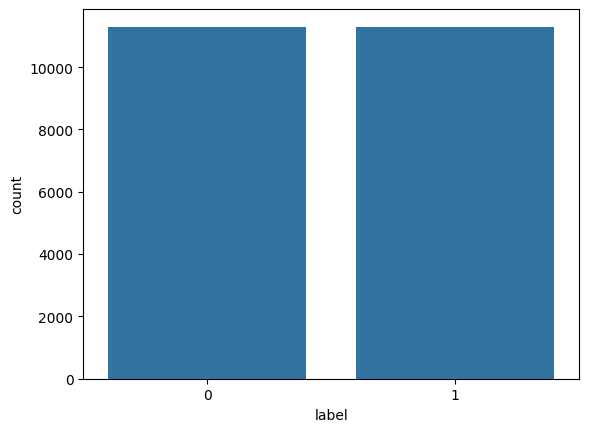

In [23]:
import seaborn as sns
sns.countplot(data=df, x='label')

🔹 2. Sequence Length Distribution
What: Histogram or KDE of sequence lengths

Why: To see if all sequences are of the same length or vary.

<Axes: xlabel='seq_length', ylabel='Count'>

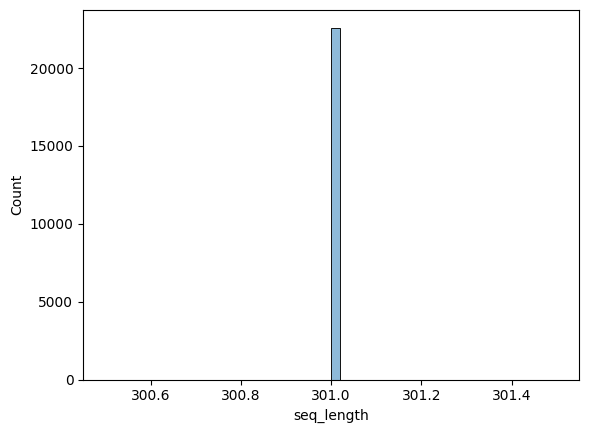

In [24]:
df['seq_length'] = df['sequence'].apply(len)
sns.histplot(df['seq_length'], bins=50, kde=True)

3. Nucleotide Frequency (Overall)
What: Bar plot of overall A/T/C/G frequencies

Why: Understand base distribution.

<Axes: >

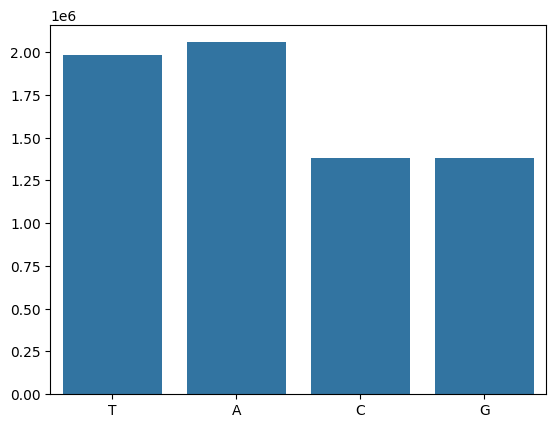

In [28]:
from collections import Counter

all_seq = ''.join(df['sequence'])
nuc_freq = Counter(all_seq)
sns.barplot(x=list(nuc_freq.keys()), y=list(nuc_freq.values()))


 4. Nucleotide Frequency by Class
What: Side-by-side bar plots (or stacked bar plots) of A/T/C/G frequencies split by label

Why: To see if nucleotide usage differs by class.

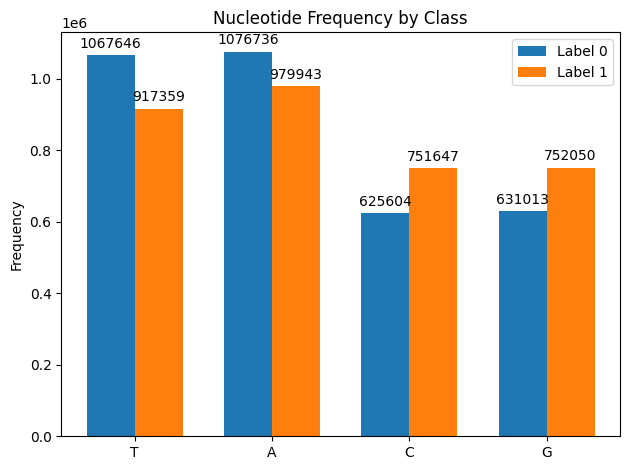

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming count_0 and count_1 are already defined as in the provided code

count_0 = Counter(df[df['label'] == 0]['sequence'].str.cat())
count_1 = Counter(df[df['label'] == 1]['sequence'].str.cat())
labels = list(count_0.keys())
values_0 = list(count_0.values())
values_1 = list(count_1.values())

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, values_0, width, label='Label 0')
rects2 = ax.bar(x + width/2, values_1, width, label='Label 1')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_title('Nucleotide Frequency by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add labels above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


5. Heatmap of nucleotide frequencies at each position (for fixed-length sequences)

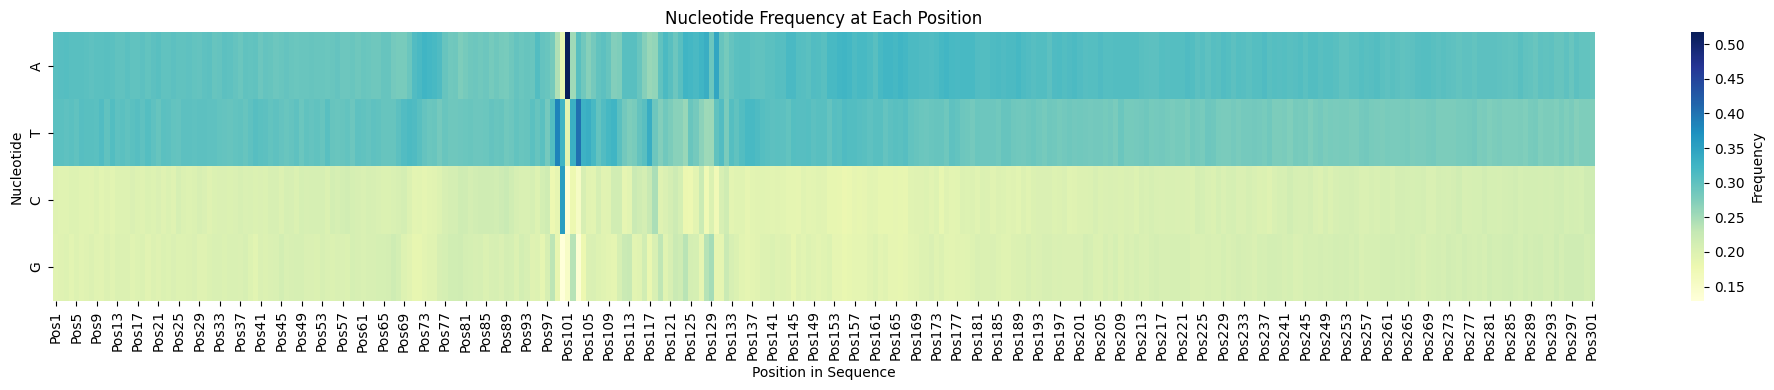

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Load your dataset (assuming it's already a DataFrame named df)
# If you're loading from CSV: df = pd.read_csv('your_file.csv')

# Step 1: Ensure all sequences are of the same length
sequence_length = df['sequence'].apply(len)
if sequence_length.nunique() != 1:
    raise ValueError("Sequences are not of uniform length.")

fixed_len = sequence_length.iloc[0]

# Step 2: Create a dictionary to hold position-wise nucleotide counts
position_counts = {nuc: [0]*fixed_len for nuc in 'ATCG'}

# Step 3: Loop through each position and count A, T, C, G
for seq in df['sequence']:
    for i, nucleotide in enumerate(seq):
        if nucleotide in position_counts:
            position_counts[nucleotide][i] += 1

# Step 4: Create DataFrame from the counts
heatmap_df = pd.DataFrame(position_counts).T  # Transpose to get nucleotides as rows
heatmap_df.columns = [f'Pos{i+1}' for i in range(fixed_len)]

# Step 5: Normalize by number of sequences to get frequencies
heatmap_df = heatmap_df / len(df)

# Step 6: Plot the heatmap
plt.figure(figsize=(20, 4))  # Adjust width based on sequence length
sns.heatmap(heatmap_df, cmap='YlGnBu', cbar_kws={'label': 'Frequency'})
plt.title('Nucleotide Frequency at Each Position')
plt.xlabel('Position in Sequence')
plt.ylabel('Nucleotide')
plt.tight_layout()
plt.show()


In [33]:
df

,sequence,label,seq_length
0,TAATTACATTATTTTTTTATTTACGAATTTGTTATTCCGCTTTTAT...,0,301
1,ATTTTTACAAGAACAAGACATTTAACTTTAACTTTATCTTTAGCTT...,0,301
2,AGAGATAGGTGGGTCTGTAACACTCGAATCAAAAACAATATTAAGA...,0,301
3,TATGTATATAGAGATAGGCGTTGCCAATAACTTTTGCGTTTTTTGC...,0,301
4,AGAAATAATAGCTAGAGCAAAAAACAGCTTAGAACGGCTGATGCTC...,0,301
...,...,...,...
11295,CGACAAAGTTTGATCCATGTGCATTCTTGGCGCCTTATCGATAGCT...,1,301
11296,CATATCTACATCTCGCTTGCTCCTTCCCTTTCGCTGCGTGTGTGTG...,1,301
11297,ATACCGCGGAAGCGCAAAAGTACCAGAATTTCCCTGGTATCGCGCT...,1,301
11298,ATTATTCCGAATTCTTTTATCAGATTTAAATATGGGAAACACTTTA...,1,301


In [34]:
df.to_csv("df.csv")

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

results = []

# Define the k-mer function
def get_kmers(sequence, size):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

# Try different values of k (3 to 8)
for k in range(3,9):
    print(f"Trying k={k}")
    df['kmers'] = df['sequence'].apply(lambda x: " ".join(get_kmers(x, size=k)))

    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(df['kmers'])
    y = df['label']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))

    results.append((k, acc))

# Print the results
print("\n🔍 Accuracy for different k values (TF-IDF):")
for k, acc in results:
    print(f"k={k} → Accuracy={acc:.4f}")


Trying k=3
Trying k=4
Trying k=5
Trying k=6
Trying k=7
Trying k=8

🔍 Accuracy for different k values (TF-IDF):
k=3 → Accuracy=0.7575
k=4 → Accuracy=0.7538
k=5 → Accuracy=0.7440
k=6 → Accuracy=0.7374
k=7 → Accuracy=0.7398
k=8 → Accuracy=0.7088


In [47]:
df[0,'kmers'].len()

KeyError: (0, 'kmers')

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier

results = []

# Define the k-mer function
def get_kmers(sequence, size):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

# Try different values of k (3 to 7)
for k in range(3, 8):
    print(f"\n🔁 Trying k={k}")
    df['kmers'] = df['sequence'].apply(lambda x: " ".join(get_kmers(x, size=k)))

    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(df['kmers'])
    y = df['label']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))

    results.append((k, acc))

# Print the results
print("\n📊 Accuracy for different k values (TF-IDF + XGBoost):")
for k, acc in results:
    print(f"k={k} → Accuracy={acc:.4f}")



🔁 Trying k=3


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:43:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔁 Trying k=4


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:43:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔁 Trying k=5


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:43:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔁 Trying k=6


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:45:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔁 Trying k=7


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:47:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📊 Accuracy for different k values (TF-IDF + XGBoost):
k=3 → Accuracy=0.7631
k=4 → Accuracy=0.7626
k=5 → Accuracy=0.7659
k=6 → Accuracy=0.7655
k=7 → Accuracy=0.7544


In [49]:
!pip install lightgbm

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from lightgbm import LGBMClassifier  # Make sure lightgbm is installed

results = []

# Define the k-mer function
def get_kmers(sequence, size):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

# Try different values of k (3 to 8)
for k in range(3, 9):
    print(f"Trying k={k}")
    df['kmers'] = df['sequence'].apply(lambda x: " ".join(get_kmers(x, size=k)))

    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(df['kmers'])
    y = df['label']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = LGBMClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    results.append((k, acc))

# Print results
print("\n🔍 Accuracy for different k values (TF-IDF + LightGBM):")
for k, acc in results:
    print(f"k={k} → Accuracy={acc:.4f}")


Trying k=3


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 9070, number of negative: 9008
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16320
[LightGBM] [Info] Number of data points in the train set: 18078, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501715 -> initscore=0.006859
[LightGBM] [Info] Start training from score 0.006859


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Trying k=4


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 9070, number of negative: 9008
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 65280
[LightGBM] [Info] Number of data points in the train set: 18078, number of used features: 256
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501715 -> initscore=0.006859
[LightGBM] [Info] Start training from score 0.006859


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Trying k=5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 9070, number of negative: 9008
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.504417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 261120
[LightGBM] [Info] Number of data points in the train set: 18078, number of used features: 1024
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501715 -> initscore=0.006859
[LightGBM] [Info] Start training from score 0.006859


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Trying k=6


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 9070, number of negative: 9008
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.354325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 977533
[LightGBM] [Info] Number of data points in the train set: 18078, number of used features: 4096
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501715 -> initscore=0.006859
[LightGBM] [Info] Start training from score 0.006859


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Trying k=7


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 9070, number of negative: 9008
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 6.119758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1626444
[LightGBM] [Info] Number of data points in the train set: 18078, number of used features: 16384
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501715 -> initscore=0.006859
[LightGBM] [Info] Start training from score 0.006859


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Trying k=8


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 9070, number of negative: 9008
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 16.801548 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1810234
[LightGBM] [Info] Number of data points in the train set: 18078, number of used features: 63277
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501715 -> initscore=0.006859
[LightGBM] [Info] Start training from score 0.006859

🔍 Accuracy for different k values (TF-IDF + LightGBM):
k=3 → Accuracy=0.7750
k=4 → Accuracy=0.7723
k=5 → Accuracy=0.7821
k=6 → Accuracy=0.7816
k=7 → Accuracy=0.7801
k=8 → Accuracy=0.7498


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [51]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Use existing 'kmers' column and 'label'
X_kmers = df['kmers']
y = df['label']

# Step 2: TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_kmers)

# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define individual classifiers
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lgbm = LGBMClassifier(random_state=42)

# Step 5: Voting Classifier (hard or soft voting)
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('xgb', xgb),
        ('lgbm', lgbm)
    ],
    voting='soft'  # or 'hard'
)

# Step 6: Train
voting_clf.fit(X_train, y_train)

# Step 7: Predict and evaluate
y_pred = voting_clf.predict(X_test)

print("🔍 Classification Report:\n")
print(classification_report(y_test, y_pred))
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:02:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 9070, number of negative: 9008
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 17.524255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1810234
[LightGBM] [Info] Number of data points in the train set: 18078, number of used features: 63277
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501715 -> initscore=0.006859
[LightGBM] [Info] Start training from score 0.006859
🔍 Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      2291
           1       0.74      0.76      0.75      2229

    accuracy                           0.75      4520
   macro avg       0.75      0.75      0.75      4520
weighted avg       0.75      0.75      0.75      4520

✅ Accuracy Score: 0.7497787610619469


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [52]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Use existing 'kmers' column and 'label'
X_kmers = df['kmers']
y = df['label']

# Step 2: TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_kmers)

# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define individual classifiers
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lgbm = LGBMClassifier(random_state=42)

# Step 5: Voting Classifier (hard or soft voting)
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('lgbm', lgbm)
    ],
    voting='soft'  # or 'hard'
)

# Step 6: Train
voting_clf.fit(X_train, y_train)

# Step 7: Predict and evaluate
y_pred = voting_clf.predict(X_test)

print("🔍 Classification Report:\n")
print(classification_report(y_test, y_pred))
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 9070, number of negative: 9008
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 18.843184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1810234
[LightGBM] [Info] Number of data points in the train set: 18078, number of used features: 63277
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501715 -> initscore=0.006859
[LightGBM] [Info] Start training from score 0.006859
🔍 Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.76      0.76      2291
           1       0.75      0.73      0.74      2229

    accuracy                           0.75      4520
   macro avg       0.75      0.75      0.75      4520
weighted avg       0.75      0.75      0.75      4520

✅ Accuracy Score: 0.7486725663716814


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [53]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Extract features and labels
X_kmers = df['kmers']
y = df['label']

# Step 2: TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_kmers)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Logistic Regression model
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = clf.predict(X_test)

print("🔍 Classification Report:\n")
print(classification_report(y_test, y_pred))
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))


🔍 Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.74      0.78      2291
           1       0.76      0.83      0.79      2229

    accuracy                           0.78      4520
   macro avg       0.79      0.79      0.78      4520
weighted avg       0.79      0.78      0.78      4520

✅ Accuracy Score: 0.7845132743362832


In [54]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Extract features and labels
X_kmers = df['kmers']
y = df['label']

# Step 2: TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_kmers)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define individual classifiers
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)
lgbm = LGBMClassifier(random_state=42)

# Step 5: Voting Classifier (soft voting recommended)
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('lr', lr),
        ('lgbm', lgbm)
    ],
    voting='soft'  # Use 'hard' for majority vote
)

# Step 6: Train the ensemble
voting_clf.fit(X_train, y_train)

# Step 7: Predict and evaluate
y_pred = voting_clf.predict(X_test)

print("🔍 Classification Report:\n")
print(classification_report(y_test, y_pred))
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 9070, number of negative: 9008
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 16.215173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1810234
[LightGBM] [Info] Number of data points in the train set: 18078, number of used features: 63277
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501715 -> initscore=0.006859
[LightGBM] [Info] Start training from score 0.006859
🔍 Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      2291
           1       0.76      0.77      0.76      2229

    accuracy                           0.77      4520
   macro avg       0.77      0.77      0.77      4520
weighted avg       0.77      0.77      0.77      4520

✅ Accuracy Score: 0.7665929203539823


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [55]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Prepare features and labels
X_kmers = df['kmers']
y = df['label']

# Step 2: TF-IDF transformation
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_kmers)

# Step 3: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Base estimators
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lgbm', LGBMClassifier(random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]

# Step 5: Stacking classifier (meta-model: logistic regression)
stacking_clf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=LogisticRegression(),
    cv=5
)

# Step 6: Train the model
stacking_clf.fit(X_train, y_train)

# Step 7: Predict and evaluate
y_pred = stacking_clf.predict(X_test)

print("🔍 Classification Report:\n")
print(classification_report(y_test, y_pred))
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 9070, number of negative: 9008
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 17.854692 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1810234
[LightGBM] [Info] Number of data points in the train set: 18078, number of used features: 63277
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501715 -> initscore=0.006859
[LightGBM] [Info] Start training from score 0.006859


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 7256, number of negative: 7206
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 14.084242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1451994
[LightGBM] [Info] Number of data points in the train set: 14462, number of used features: 60729
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501729 -> initscore=0.006915
[LightGBM] [Info] Start training from score 0.006915


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 7256, number of negative: 7206
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 13.913858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1451962
[LightGBM] [Info] Number of data points in the train set: 14462, number of used features: 60772
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501729 -> initscore=0.006915
[LightGBM] [Info] Start training from score 0.006915


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 7256, number of negative: 7206
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 14.705186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1450941
[LightGBM] [Info] Number of data points in the train set: 14462, number of used features: 60661
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501729 -> initscore=0.006915
[LightGBM] [Info] Start training from score 0.006915


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 7256, number of negative: 7207
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 14.796137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1451654
[LightGBM] [Info] Number of data points in the train set: 14463, number of used features: 60719
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501694 -> initscore=0.006776
[LightGBM] [Info] Start training from score 0.006776


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 7256, number of negative: 7207
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 14.130337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1451659
[LightGBM] [Info] Number of data points in the train set: 14463, number of used features: 60708
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501694 -> initscore=0.006776
[LightGBM] [Info] Start training from score 0.006776


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


🔍 Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      2291
           1       0.76      0.82      0.79      2229

    accuracy                           0.79      4520
   macro avg       0.79      0.79      0.79      4520
weighted avg       0.79      0.79      0.79      4520

✅ Accuracy Score: 0.7878318584070797


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [56]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Prepare features and labels
X_kmers = df['kmers']
y = df['label']

# Step 2: TF-IDF transformation
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_kmers)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Naive Bayes model
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = nb_clf.predict(X_test)

print("🔍 Classification Report:\n")
print(classification_report(y_test, y_pred))
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))


🔍 Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      2291
           1       0.75      0.72      0.73      2229

    accuracy                           0.74      4520
   macro avg       0.74      0.74      0.74      4520
weighted avg       0.74      0.74      0.74      4520

✅ Accuracy Score: 0.7404867256637168


In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

# ---------------------------
# 1. Load your dataset
# ---------------------------
X = df['sequence']
y = df['label']

# ---------------------------
# 2. Tokenize using k-mers (e.g., k=6)
# ---------------------------
def get_kmers(seq, k=6):
    return ' '.join([seq[i:i+k] for i in range(len(seq) - k + 1)])

X_kmers = X.apply(get_kmers)

# ---------------------------
# 3. Convert k-mers to tokens
# ---------------------------
tokenizer = Tokenizer(char_level=False)
tokenizer.fit_on_texts(X_kmers)
X_seq = tokenizer.texts_to_sequences(X_kmers)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

# Pad sequences to equal length
X_pad = pad_sequences(X_seq, padding='post')

# ---------------------------
# 4. Encode labels
# ---------------------------
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)

# ---------------------------
# 5. Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_cat, test_size=0.2, random_state=42)

# ---------------------------
# 6. Build CNN model (optimized)
# ---------------------------
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=X_pad.shape[1]),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    BatchNormalization(),
    GlobalMaxPooling1D(),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    Dense(2, activation='softmax')  # 2 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ---------------------------
# 7. Train for exactly 10 epochs
# ---------------------------
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1  # 10% of training used for validation
)

# ---------------------------
# 8. Evaluate
# ---------------------------
loss, acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {acc:.4f}")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


255/255 ━━━━━━━━━━━━━━━━━━━━ 71s 270ms/step - accuracy: 0.5564 - loss: 1.0950 - val_accuracy: 0.6947 - val_loss: 0.7466
Epoch 2/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 68s 268ms/step - accuracy: 0.6927 - loss: 0.6457 - val_accuracy: 0.7406 - val_loss: 0.6556
Epoch 3/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 82s 268ms/step - accuracy: 0.7601 - loss: 0.5538 - val_accuracy: 0.7605 - val_loss: 0.5613
Epoch 4/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 70s 272ms/step - accuracy: 0.8020 - loss: 0.4869 - val_accuracy: 0.7815 - val_loss: 0.5218
Epoch 5/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 82s 271ms/step - accuracy: 0.8341 - loss: 0.4251 - val_accuracy: 0.7765 - val_loss: 0.5166
Epoch 6/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 83s 276ms/step - accuracy: 0.8581 - loss: 0.3746 - val_accuracy: 0.7721 - val_loss: 0.5255
Epoch 7/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 69s 269ms/step - accuracy: 0.8753 - loss: 0.3417 - val_accuracy: 0.7649 - val_loss: 0.5524
Epoch 8/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 81s 266ms/step - accuracy: 0.8987 - loss: 0.2975 - val

In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Step 1: Encode nucleotides as one-hot vectors
def one_hot_encode_seq(seq, max_len):
    mapping = {'A': [1,0,0,0],
               'T': [0,1,0,0],
               'C': [0,0,1,0],
               'G': [0,0,0,1]}
    encoded = [mapping.get(base, [0,0,0,0]) for base in seq.upper()]

    # Pad or trim to max_len
    if len(encoded) < max_len:
        encoded += [[0,0,0,0]] * (max_len - len(encoded))  # pad
    else:
        encoded = encoded[:max_len]  # trim
    return np.array(encoded)

# Step 2: Set a fixed input length (e.g., 200 bases)
MAX_LEN = 200

# Step 3: Prepare X and y
X = np.array([one_hot_encode_seq(seq, MAX_LEN) for seq in df['sequence']])
y = np.array(df['label'])

# Step 4: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(MAX_LEN, 4), return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Step 6: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 7: Train the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.1,
                    verbose=1)

# Step 8: Evaluate
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 34s 115ms/step - accuracy: 0.6144 - loss: 0.6585 - val_accuracy: 0.6405 - val_loss: 0.6266
Epoch 2/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 29s 115ms/step - accuracy: 0.6485 - loss: 0.6344 - val_accuracy: 0.6350 - val_loss: 0.6422
Epoch 3/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 40s 113ms/step - accuracy: 0.6449 - loss: 0.6338 - val_accuracy: 0.6433 - val_loss: 0.6306
Epoch 4/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 41s 112ms/step - accuracy: 0.6461 - loss: 0.6269 - val_accuracy: 0.6532 - val_loss: 0.6247
Epoch 5/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 42s 114ms/step - accuracy: 0.6532 - loss: 0.6236 - val_accuracy: 0.6571 - val_loss: 0.6174
Epoch 6/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 40s 158ms/step - accuracy: 0.6562 - loss: 0.6128 - val_accuracy: 0.6405 - val_loss: 0.6339
Epoch 7/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 29s 113ms/step - accuracy: 0.6599 - loss: 0.6132 - val_accuracy: 0.6576 - val_loss: 0.6182
Epoch 8/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 29s 113ms/step - accuracy: 0.6729 - loss: 0

In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Step 1: One-hot encoding for DNA sequence
def one_hot_encode_seq(seq, max_len):
    mapping = {'A': [1,0,0,0],
               'T': [0,1,0,0],
               'C': [0,0,1,0],
               'G': [0,0,0,1]}
    encoded = [mapping.get(base.upper(), [0,0,0,0]) for base in seq]
    if len(encoded) < max_len:
        encoded += [[0,0,0,0]] * (max_len - len(encoded))
    else:
        encoded = encoded[:max_len]
    return np.array(encoded)

# Step 2: Parameters
MAX_LEN = 200  # Set based on average DNA sequence length

# Step 3: Prepare the dataset
X = np.array([one_hot_encode_seq(seq, MAX_LEN) for seq in df['sequence']])
y = np.array(df['label'])

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Build BiLSTM model
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=False), input_shape=(MAX_LEN, 4)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Step 6: Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 7: Train model
model.fit(X_train, y_train,
          epochs=10,
          batch_size=64,
          validation_split=0.1,
          verbose=1)

# Step 8: Evaluate model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 57s 202ms/step - accuracy: 0.6042 - loss: 0.6538 - val_accuracy: 0.6499 - val_loss: 0.6294
Epoch 2/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 79s 191ms/step - accuracy: 0.6514 - loss: 0.6247 - val_accuracy: 0.6582 - val_loss: 0.6201
Epoch 3/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 83s 196ms/step - accuracy: 0.6526 - loss: 0.6219 - val_accuracy: 0.6460 - val_loss: 0.6289
Epoch 4/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 82s 196ms/step - accuracy: 0.6630 - loss: 0.6142 - val_accuracy: 0.6654 - val_loss: 0.6100
Epoch 5/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 81s 192ms/step - accuracy: 0.6579 - loss: 0.6175 - val_accuracy: 0.6582 - val_loss: 0.6168
Epoch 6/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 83s 196ms/step - accuracy: 0.6716 - loss: 0.6018 - val_accuracy: 0.6643 - val_loss: 0.6115
Epoch 7/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 84s 205ms/step - accuracy: 0.6736 - loss: 0.5970 - val_accuracy: 0.6388 - val_loss: 0.6336
Epoch 8/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 82s 205ms/step - accuracy: 0.6755 - loss: 0